2.2 Implement the calculation of a matrix-matrix multiplication A*B = C, where A, B, and C are NxN matrices using Python using 
1) loops (naive implementation) 
2) using np.matmul from NumPy

In [67]:
# First Naive Implementation of the algorithm
import numpy as np 
import matplotlib.pyplot as plt
import time as time 

def RandomMatrix(Nrows, Ncols):
    return np.random.rand(Nrows, Ncols)

# 2.2 - 1) Complexity analysis of the naive and NumPy-based implementation of matrix-matrix multiplication

In [68]:
def MatrixMultiplication_Naive(A, B, diagnostic = False):
    Nrows = len(A)
    Ncols = len(B[0])
    K = len(A[0])
    C = [[0] * Ncols for _ in range(Nrows)]
    time1 = time.time()
    for i in range(Nrows):
        for k in range(K):
            temp = A[i][k]
            for j in range(Ncols):
                C[i][j] += temp * B[k][j]
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2 - time1}")
    return C, time2 - time1


In [69]:
def MatrixMultiplication_NumPy(A, B, diagnostic = False):
    Nrows = A.shape[0]
    Ncols = B.shape[1]
    time1 = time.time()
    C = np.matmul(A,B)
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2-time1}")
    return C, time2-time1

In [70]:
def Time_by_Size(func, N):
    "Time taken by the function by varying the size of the matrix"
    A = [RandomMatrix(Nval, Nval) for Nval in N] 
    B = [RandomMatrix(Nval, Nval) for Nval in N] 
    time_by_n = []
    for i in range(len(N)):
        _, time1 = func(A[i], B[i])
        time_by_n.append(time1)
    return np.array(time_by_n)

In [71]:
N = [64, 128, 256, 512, 1024, 2048]
time_by_n_numpy = Time_by_Size(MatrixMultiplication_NumPy, N)
time_by_n_naive = Time_by_Size(MatrixMultiplication_Naive, N)

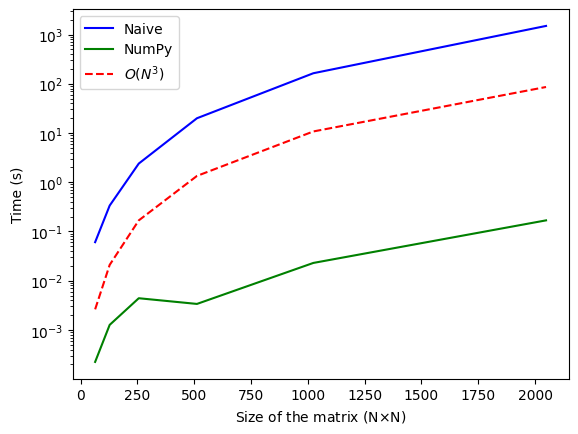

In [72]:
fig, ax = plt.subplots()
ax.plot(N, time_by_n_naive, label = "Naive", color = "blue")
ax.plot(N, time_by_n_numpy, label = "NumPy", color = "green")
ax.plot(N, (np.array(N)**3)*1e-8, label = r"$O(N^3)$", color = "red", linestyle = "--")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Time (s)")
ax.legend()
plt.show()

2.2 - 1) The mathematical complexity of calculating the matrix-matrix multiplication A*B = C is O(N^3) for both the naive implementation and the NumPy-based implementation. This is because the matrix-matrix multiplication involves three nested loops, each iterating over the dimensions of the matrices (N x N) - for each entry of the result matrix N x N calculations must be done (N rows of A times N columns of B), and this is done for each entry of the result matrix which are again N values.

# 2.2 - 2) Rounding Error

In [73]:
def RoundingError(func, Nrows, Ncols):
    " Rounding error using single-precision floating point numbers with respect to double-precision floating point numbers"
    A_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    B_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    C_double, _ = func(A_double, B_double)
    C_double = np.array(C_double)
    A_single = A_double.astype(np.float32)
    B_single = B_double.astype(np.float32)
    C_single, _ = func(A_single, B_single)
    C_single = np.array(C_single)
    C_single2 = C_single.astype(np.float64)
    return np.linalg.norm(C_double - C_single2)


In [74]:
# Example usage:
error_NumPy = []
error_Naive = []

for N_ in N:
    error = RoundingError(MatrixMultiplication_NumPy, N_, N_)
    error_NumPy.append(error)

for N_ in N:
    error = RoundingError(MatrixMultiplication_Naive, N_, N_)
    error_Naive.append(error)

KeyboardInterrupt: 

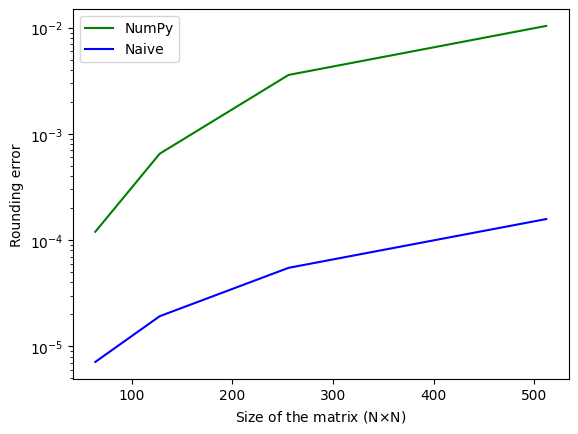

In [ ]:
# Plotting the results
fig, ax = plt.subplots()
ax.plot(N, error_NumPy, label = "NumPy", color = "green")
ax.plot(N, error_Naive, label = "Naive", color = "blue")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Rounding error")
ax.legend()
plt.show()

#### 2.2 - 3) How does the rounding error grow by increasing N? Linearly, quadratically, cubically, exponentially, ...? Why is that? Hint: think about the complexity/number of operations needed.

2.2 - 3) The error grow cubically with the size of the matrix. This is because the error in each individual multiplication operation is propagated through the entire matrix multiplication process. Since the matrix-matrix multiplication involves O(N^3) operations, the error grows cubically with the size of the matrix.